# SEGMENTATION:
This project aims to process image segmentation  to locate Glioblastome pictures.

##  FILES LOCATION

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# list all folder and subfolder
# use the %ls magic

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%ls sample_data/

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [ ]:
%ls drive/

MyDrive/


In [ ]:
# find the zip file

In [ ]:
%ls drive/MyDrive/glioblastome/Brain-Tumor-Progression.zip

drive/MyDrive/glioblastome/Brain-Tumor-Progression.zip


In [ ]:
# unzip the file in the local directory

In [ ]:
!unzip drive/MyDrive/glioblastome/Brain-Tumor-Progression.zip -d .

Archive:  drive/MyDrive/glioblastome/Brain-Tumor-Progression.zip
   creating: ./Brain-Tumor-Progression - Backup - Copie/
   creating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/
   creating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/
   creating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/37908.000000-T2reg-21119/
  inflating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/37908.000000-T2reg-21119/1-01.dcm  
  inflating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/37908.000000-T2reg-21119/1-02.dcm  
  inflating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/37908.000000-T2reg-21119/1-03.dcm  
  inflating: ./Brain-Tumor-Progression - Backup - Copie/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/37908.000000-T2reg-21119/1-04.dcm  
  inflating

In [ ]:
%ls drive/MyDrive/glioblastome/

Brain-Tumor-Progression.zip


In [ ]:
pwd

'/content'

In [ ]:
cd /content

/content


In [ ]:
ls /content/

'Brain-Tumor-Progression - Backup - Copie'/   drive/   sample_data/


In [ ]:
mkdir /content/Brain-Tumor-Progression/

In [ ]:
cp -R /content/Brain-Tumor-Progression\ -\ Backup\ -\ Copie/ /content/Brain-Tumor-Progression/

In [ ]:
%ls /content/Brain-Tumor-Progression/ | wc -l

1


In [ ]:
%ls /content/Brain-Tumor-Progression\ -\ Backup\ -\ Copie/

PGBM-001/  PGBM-004/  PGBM-007/  PGBM-010/  PGBM-013/  PGBM-016/  PGBM-019/
PGBM-002/  PGBM-005/  PGBM-008/  PGBM-011/  PGBM-014/  PGBM-017/  PGBM-020/
PGBM-003/  PGBM-006/  PGBM-009/  PGBM-012/  PGBM-015/  PGBM-018/


In [ ]:
rm -rf  /content/Brain-Tumor-Progression/Brain-Tumor-Progression

In [ ]:
%ls /content/

 Brain-Tumor-Progression/                     drive/
'Brain-Tumor-Progression - Backup - Copie'/   sample_data/


In [ ]:
# copy files to our directory where we are going to work

In [ ]:
%cp -r ./'Brain-Tumor-Progression - Backup - Copie'/.  ./Brain-Tumor-Progression/

In [ ]:
%ls Brain-Tumor-Progression/

PGBM-001/  PGBM-004/  PGBM-007/  PGBM-010/  PGBM-013/  PGBM-016/  PGBM-019/
PGBM-002/  PGBM-005/  PGBM-008/  PGBM-011/  PGBM-014/  PGBM-017/  PGBM-020/
PGBM-003/  PGBM-006/  PGBM-009/  PGBM-012/  PGBM-015/  PGBM-018/


In [ ]:
rm -rf ./Brain-Tumor-Progression/'Brain-Tumor-Progression - Backup - Copie'/

In [ ]:
%pwd

'/content'

Create a dataframe per patient where we have:
- the patient id
- study id
- image id
- mask id


## DATA PREPARATION

In [ ]:
# Import librairies
import glob2
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
!pip install pydicom
import pydicom as dicom
from tqdm import tqdm
from tensorflow.keras.optimizers import *

     |████████████████████████████████| 1.9MB 7.7MB/s 


In [ ]:
# Change current directory where data are located
os.chdir('/content/Brain-Tumor-Progression')

FileNotFoundError: ignored

In [ ]:
# Change current directory where data are located
os.chdir('/content/drive/MyDrive/Brain-Tumor-Progression/')

In [ ]:
# list of masks
masks_list = glob2.glob('./PGBM-001/*/*Mask*/*.dcm')

In [ ]:
# list of images
t2_imgs_list = glob2.glob('./PGBM-001/*/*T2*/*.dcm')

In [ ]:
# same number of masks & images
assert len(masks_list) == len(t2_imgs_list)

# total number of pairs
total_pairs = (len(masks_list) + len(t2_imgs_list) )/2


In [ ]:
#  create a dataframe where the study id , mask id , the patient id , slice id
masks_list_split = [mask_path.split("/") for mask_path in  masks_list]
df_masks_list_split = pd.DataFrame(masks_list_split, columns = ["dot","patient_id","study_id","mask_id","slice_id"]).drop(columns=["dot"])
df_masks_list_split.head()

,patient_id,study_id,mask_id,slice_id
0,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,5364.000000-MaskTumor-94345,1-16.dcm
1,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,5364.000000-MaskTumor-94345,1-01.dcm
2,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,5364.000000-MaskTumor-94345,1-25.dcm
3,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,5364.000000-MaskTumor-94345,1-17.dcm
4,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,5364.000000-MaskTumor-94345,1-02.dcm


In [ ]:
#  create a dataframe where the study id , image id , the patient id , slice id
imgs_list_split = [t2_img.split("/") for t2_img in  t2_imgs_list]
df_imgs_list_split = pd.DataFrame(imgs_list_split, columns = ["dot","patient_id","study_id","modality_id","slice_id"]).drop(columns=["dot"])
df_imgs_list_split.head()

,patient_id,study_id,modality_id,slice_id
0,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-16.dcm
1,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-01.dcm
2,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-25.dcm
3,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-17.dcm
4,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-02.dcm


In [ ]:
# inner join
df_patient1_pair_sorted = df_imgs_list_split.merge(df_masks_list_split, on = ["patient_id", "study_id", "slice_id"]).sort_values(by=["patient_id",
                                                                                                           "study_id",
                                                                                                           "modality_id",
                                                                                                           "mask_id",
                                                                                                           "slice_id"])

In [ ]:
# check that the number of lines == number of pairs (images, masks)
assert df_patient1_pair_sorted.shape[0] == total_pairs

In [ ]:
def process_each_patient(patient_id):
  """
  function which takes the patient id and return a dataframe with masks and images aligned as pairs
  """
  # list of masks (can also be written : str("%03d" % i)) (Masks)

  masks_list = glob2.glob('./PGBM-{0:03d}/*/*Mask*/*.dcm'.format(patient_id))

  # list of images (can also be written : str("%03d" % i)) (T2 modality)
  t2_imgs_list = glob2.glob('./PGBM-{0:03d}/*/*T2*/*.dcm'.format(patient_id))

  # same number of masks & images
  assert len(masks_list) == len(t2_imgs_list)

  # total number of pairs
  total_pairs = (len(masks_list) + len(t2_imgs_list) )/2

  #  create a dataframe where the study id , mask id , the patient id , slice id
  masks_list_split = [mask_path.split("/") for mask_path in  masks_list]
  df_masks_list_split = pd.DataFrame(masks_list_split, columns = ["dot","patient_id","study_id","mask_id","slice_id"]).drop(columns=["dot"])

  #  create a dataframe where the study id , image id , the patient id , slice id
  imgs_list_split = [t2_img.split("/") for t2_img in  t2_imgs_list]
  df_imgs_list_split = pd.DataFrame(imgs_list_split, columns = ["dot","patient_id","study_id","modality_id","slice_id"]).drop(columns=["dot"])

  #  create a dataframe where the study id , image id , the patient id , slice id
  df_patient_pair_sorted = df_imgs_list_split.merge(df_masks_list_split, on = ["patient_id", "study_id", "slice_id"]).sort_values(by=["patient_id",
                                                                                                           "study_id",
                                                                                                           "modality_id",
                                                                                                           "mask_id",
                                                                                                           "slice_id"]).reset_index(drop=True)
  # check that the number of lines == number of pairs (images, masks)
  # assert df_patient1_pair_sorted.shape[0] == total_pairs

  # aligned dataframe
  return df_patient_pair_sorted


In [ ]:
# empty list where we will append/put patients dataframes
patients_df = []
n_patients = 20

for i in range(1, n_patients + 1,1):
  patients_df.append(process_each_patient(i))

assert len(patients_df) == n_patients

In [ ]:
# dataframe concatenated with images-masks pairs
df_raw = pd.concat(patients_df, axis=0).reset_index(drop=True)

# save intermediate raw dataframe
df_raw.to_csv("./df_patients_raw.csv", sep=',', index=True)

# visualize the intermediate df
df_raw.head()

,patient_id,study_id,modality_id,slice_id,mask_id
0,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-01.dcm,5388.000000-MaskTumor-63335
1,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-02.dcm,5388.000000-MaskTumor-63335
2,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-03.dcm,5388.000000-MaskTumor-63335
3,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-04.dcm,5388.000000-MaskTumor-63335
4,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-05.dcm,5388.000000-MaskTumor-63335


### Segmentation problems can have *imbalance* problems:
- at the dataset level ( more slices without tumors than with tumors)
- within a slice the number of pixels associated with the tumor label is very little wrt pixels associated with the background label.

#### Imbalanced datasets : <u>Oversampling</u>

In [ ]:
# Step 1: create full paths. (for masks)
# step 2: create a function which returns 1 when a tumor is present and zero when not present.
# Step 3: apply/map a function to the new column.

In [ ]:
# Define raw folder where dcm files are located
root_folder = "/content/Brain-Tumor-Progression/"

# Reconstruct masks path from the df_raw dataframe
df_raw['mask_path'] = df_raw.apply(lambda row:os.path.join(root_folder, str(row['patient_id']),
                                                           str(row['study_id']),
                                                           str(row['mask_id']),
                                                           str(row['slice_id'])),axis=1)
assert os.path.exists(df_raw['mask_path'][0]) == True

df_raw['img_path'] =  df_raw.apply(lambda row:os.path.join(root_folder, str(row['patient_id']),
                                                           str(row['study_id']),
                                                           str(row['modality_id']),
                                                           str(row['slice_id'])), axis=1)
assert os.path.exists(df_raw['img_path'][0]) == True

In [ ]:
# Vizualisation of a mask
def display_mask(mask_path):
  """ Function to display a mask from a mask path
  """
  ds = dicom.dcmread(mask_path)
  pixel_array_numpy = ds.pixel_array
  plt.title(mask_path)
  plt.imshow(pixel_array_numpy)
  plt.show()
  """if "18.dcm" in mask_path and "1989-HEAD" in mask_path:
    return mask_path
  else:
    return None"""

In [ ]:
# Extract pixel information from dicom file
def getPixelDataFromDicom(filename):
  """Get pixel values from a dicom file"""
  return dicom.read_file(filename).pixel_array

In [ ]:
# Oversample the tumors sample in the dataset
def oversample(df, patient_ID):
  """Oversample the minority class (tumors in our case).
  Inputs
  df : Is a dataframe containing images and corresponding masks paths, and patient_ID
  patient_ID : Identifier of the patients from '001' to '020'.
  returns : The concatenated dataframe containing images and corresonding tumor mask
  with the number of slices without tumor same as the number of slices with tumors."""

  df['Unique_values'] = [np.unique(getPixelDataFromDicom(mask)) for mask in df['mask_path']]
  df['Tumor'] = [int(np.any(val)) for val in df['Unique_values']]
  df_patient = df[df['patient_id'] == patient_ID]

  # select patient with tumor
  df_tumor = df[df['Tumor'] == 1]

  # Count number of tumors by Patient
  df_tumor.groupby(by = "patient_id").agg("count")[["Tumor"]]

  # Extract index of slices with tumor for patient 1
  index_list_df_tumor = list(df_tumor[df_tumor["patient_id"] == patient_ID].index)

  # Get nb of slice without tumor for each patient
  df_patient_no_tumor = df_patient[df_patient['Tumor'] == 0]

  # Oversample tumor n times (with n nb of slice without tumors)
  index_list_df_tumor_oversampled = np.random.choice(index_list_df_tumor, len(df_patient_no_tumor))

  # Apply the index list to the df dataframe
  df_tumor_patient = df.iloc[index_list_df_tumor_oversampled]

  # Reset the index and keep the Patient as a column
  df_tumor_patient_clean = df_tumor_patient.reset_index(drop = True)

  # For patient 1 select slices without tumor
  df_patient_no_tumor = df_patient[df_patient['Tumor'] == 0]

  # reset index before the concatenation with the dataset without tumor
  frames = [df_tumor_patient_clean, df_patient_no_tumor]
  df_tumor_patient_clean = df_tumor_patient_clean.reset_index()
  df_patient_no_tumor = df_patient_no_tumor.reset_index()
  result = pd.concat(frames)

  assert len(result[result['Tumor'] == 0]) == len(result[result['Tumor']==1])
  return result

In [ ]:
# Create id list for all patients
list_patients_id = np.unique(df_raw['patient_id'])

In [ ]:
# Oversample dataframe
appended_data = []
for patient in tqdm(list_patients_id):
  oversample_data = oversample(df = df_raw, patient_ID = patient)
  appended_data.append(oversample_data)
appended_data = pd.concat(appended_data)

100%|██████████| 20/20 [01:20<00:00,  4.01s/it]


In [ ]:
appended_data.head()

,patient_id,study_id,modality_id,slice_id,mask_id,mask_path,img_path,Unique_values,Tumor
0,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-20.dcm,5364.000000-MaskTumor-94345,/content/Brain-Tumor-Progression/PGBM-001/11-1...,/content/Brain-Tumor-Progression/PGBM-001/11-1...,"[0, 1]",1
1,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-20.dcm,5364.000000-MaskTumor-94345,/content/Brain-Tumor-Progression/PGBM-001/11-1...,/content/Brain-Tumor-Progression/PGBM-001/11-1...,"[0, 1]",1
2,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-15.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1
3,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-20.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1
4,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-16.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1


In [ ]:
# 1st step : Split dataframe train, val, test and save them on disk
# 2nd step create another notebook with the unet model
# 3rd step data generator
# Loss function(s)

In [ ]:
# Export oversampled df
appended_data.to_csv("oversampled_dataframe_21_12.csv", index = False, header=True)

In [ ]:
df_raw_mask_patient11 = df_raw['mask_path'][df_raw['mask_path'].str.contains("PGBM-011")]

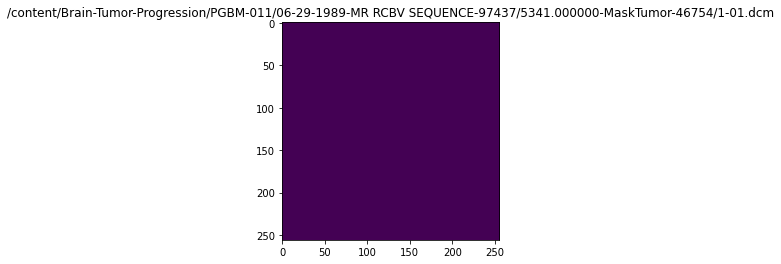

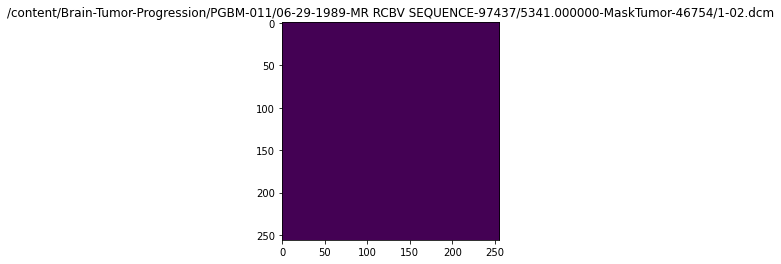

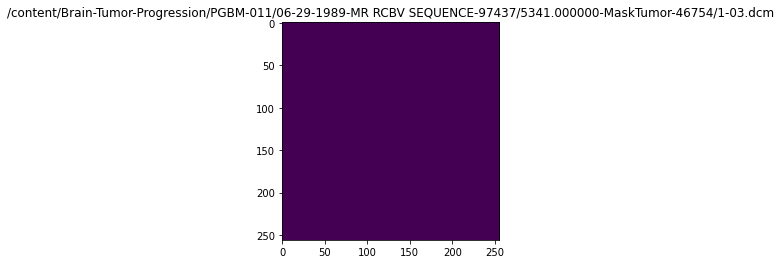

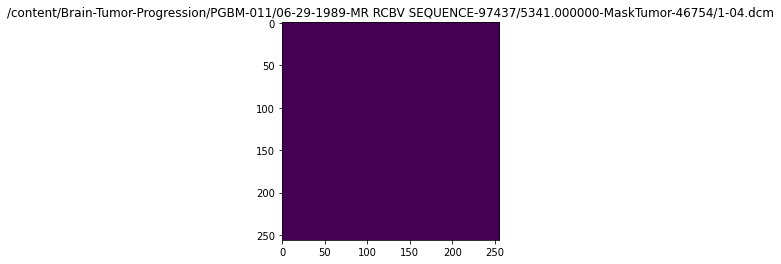

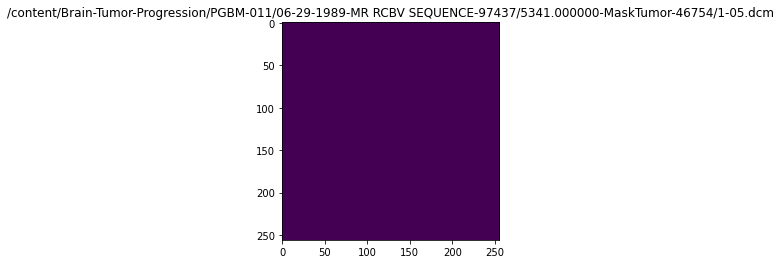

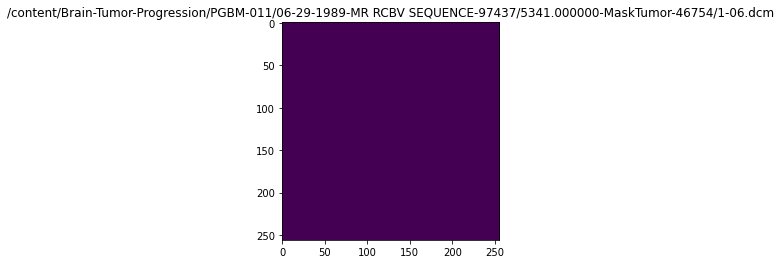

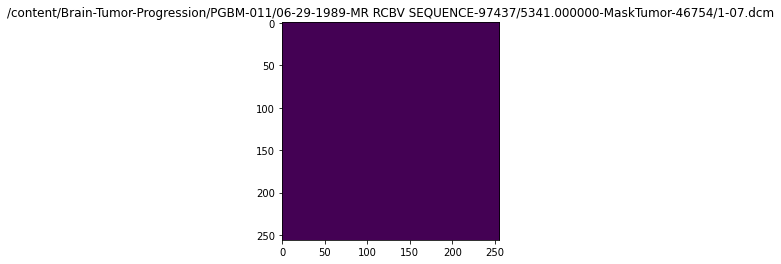

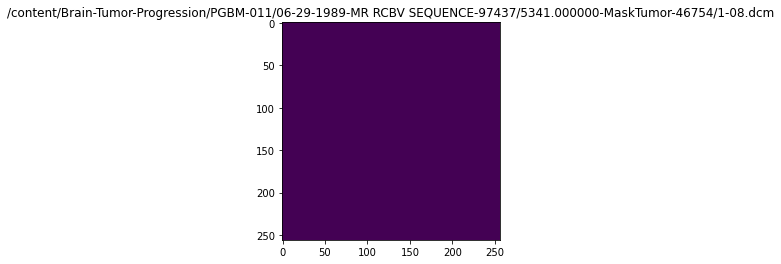

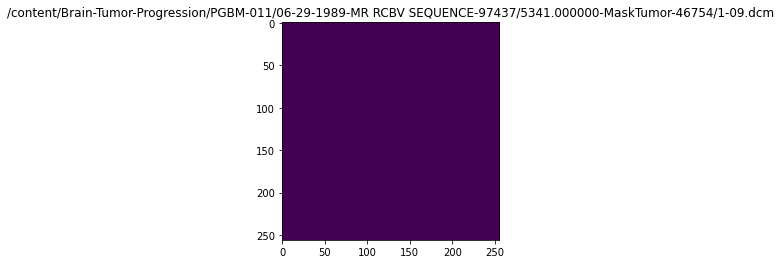

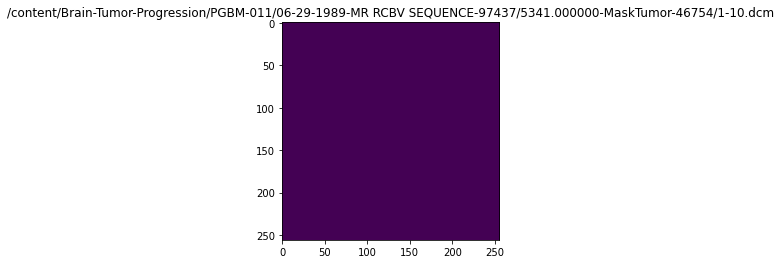

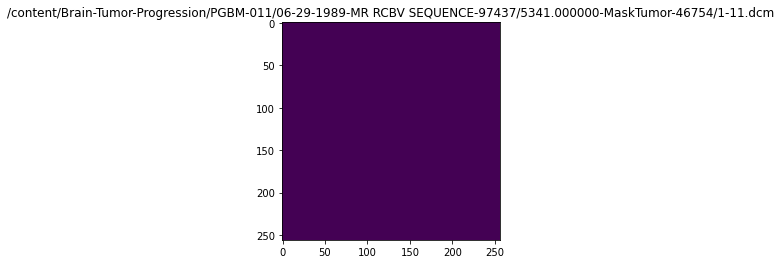

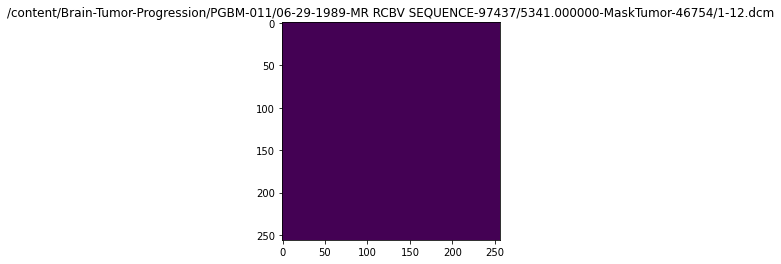

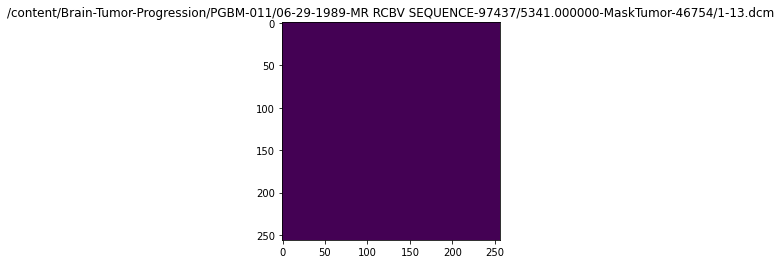

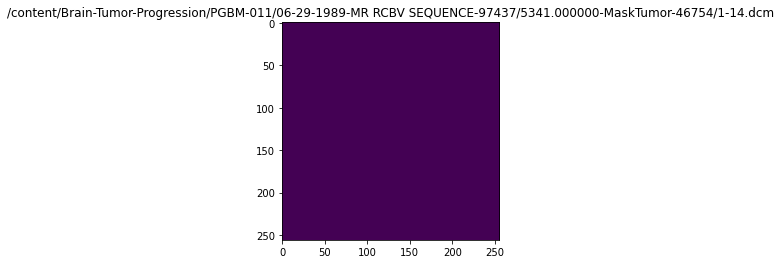

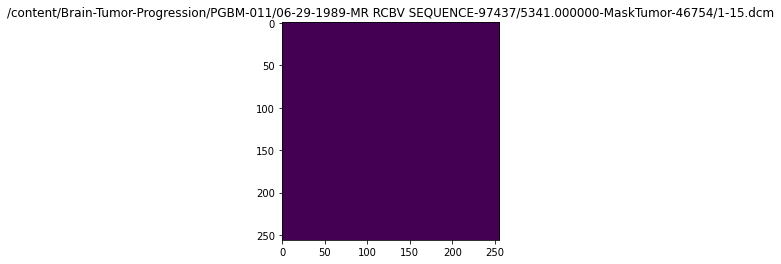

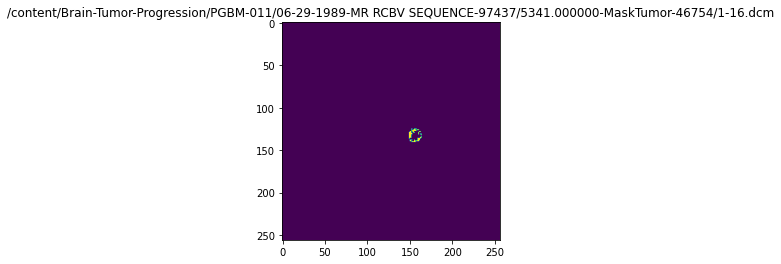

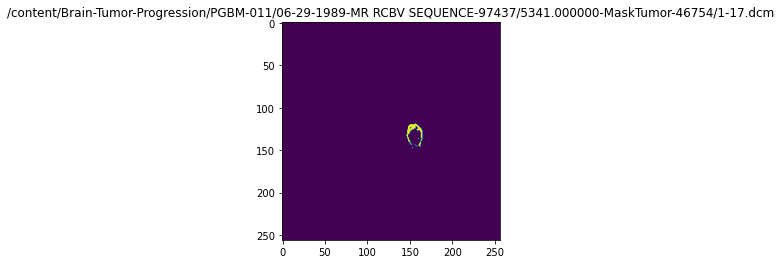

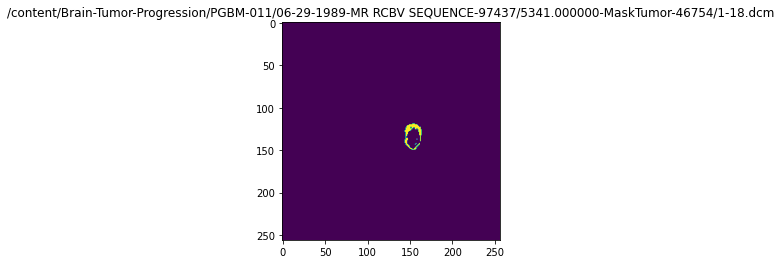

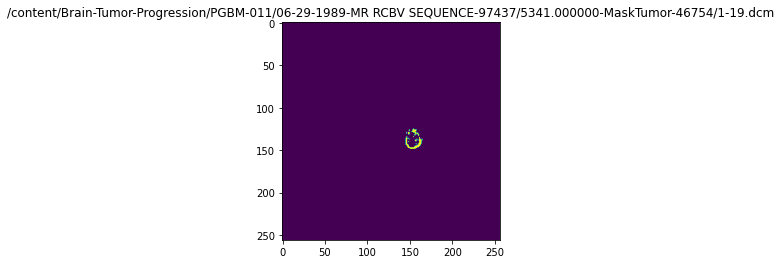

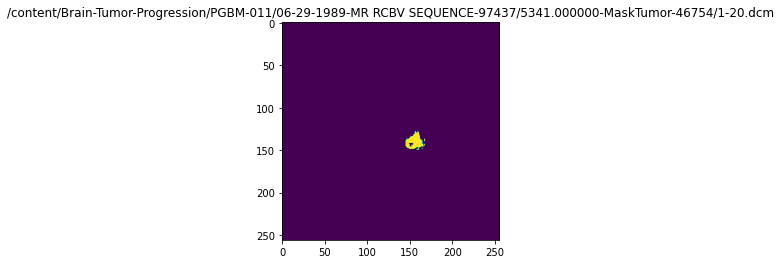

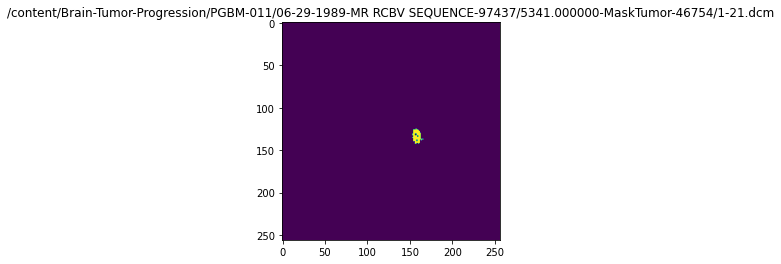

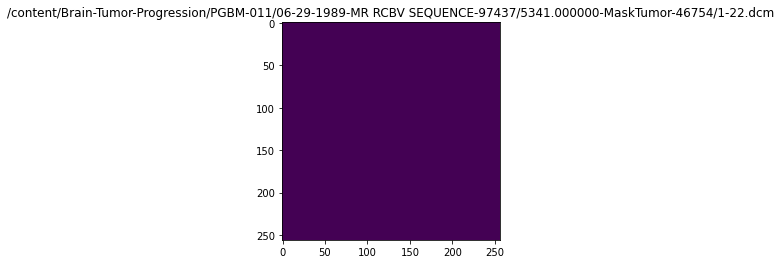

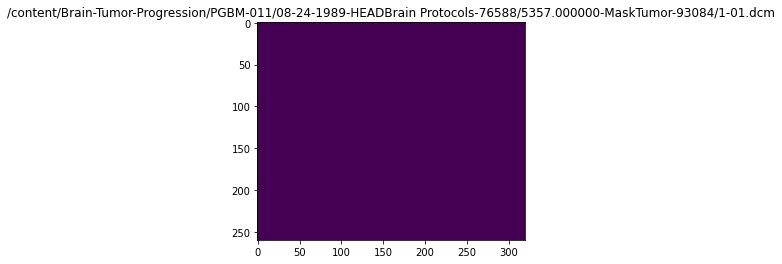

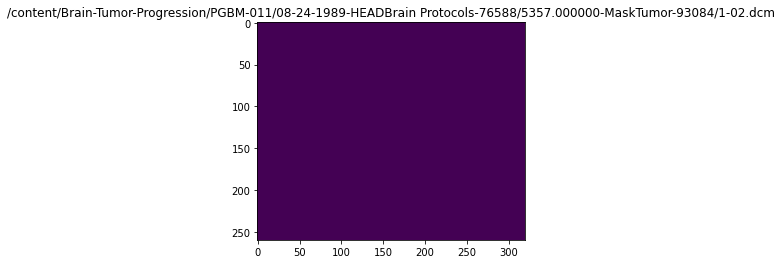

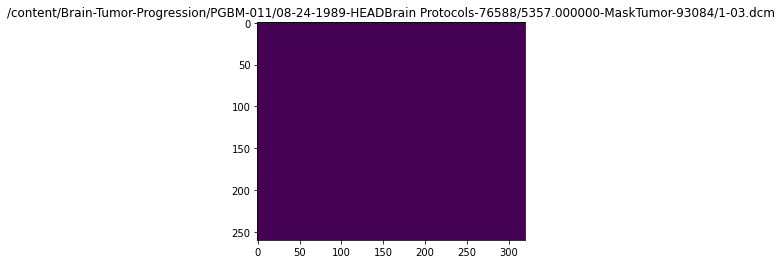

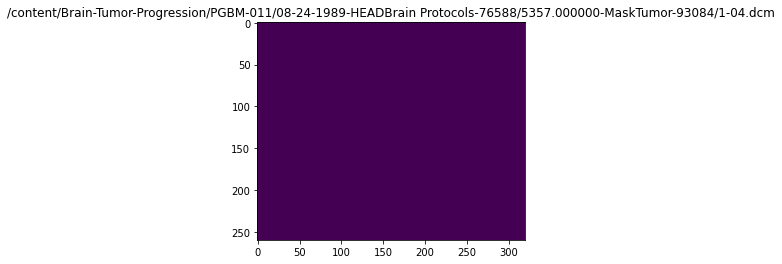

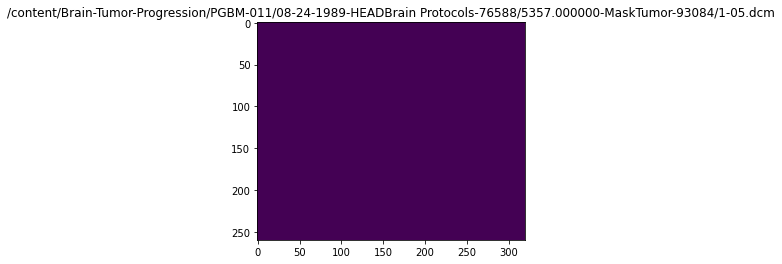

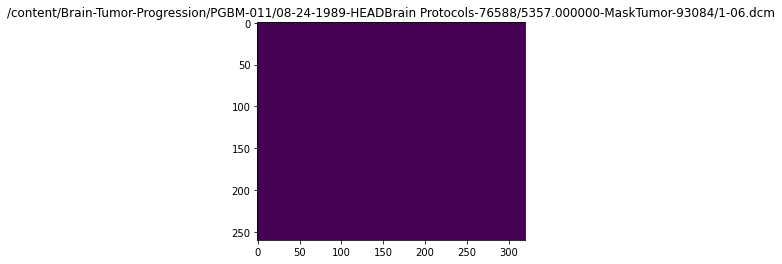

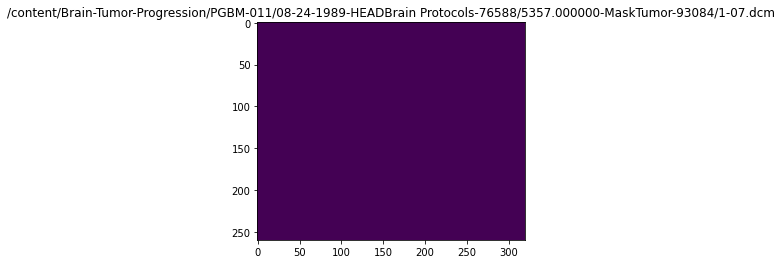

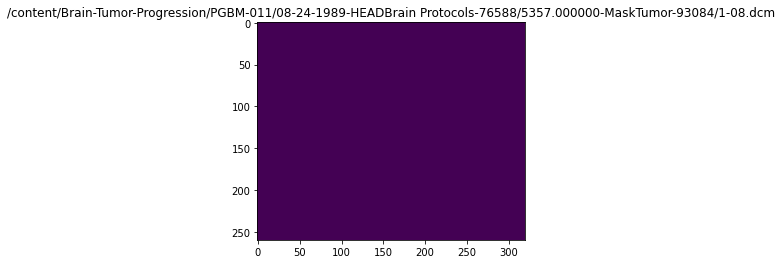

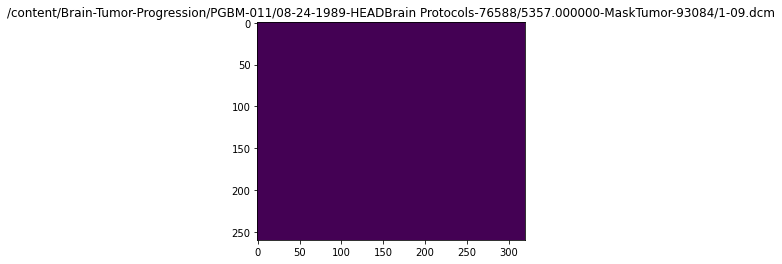

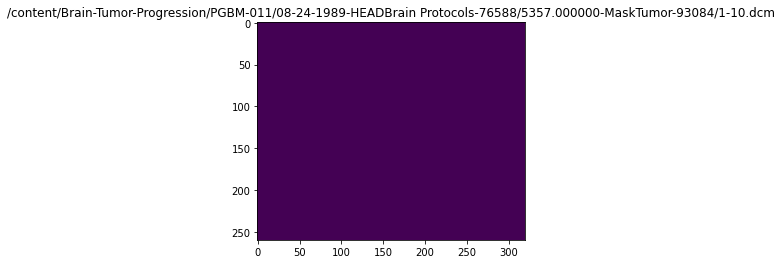

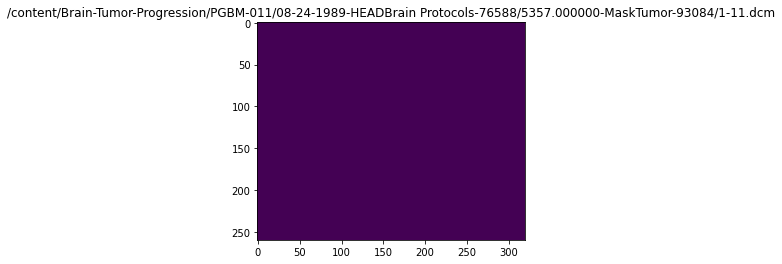

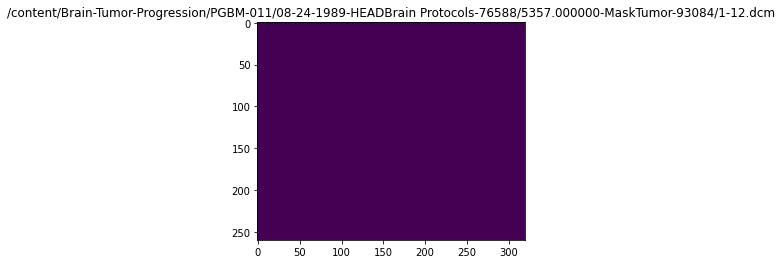

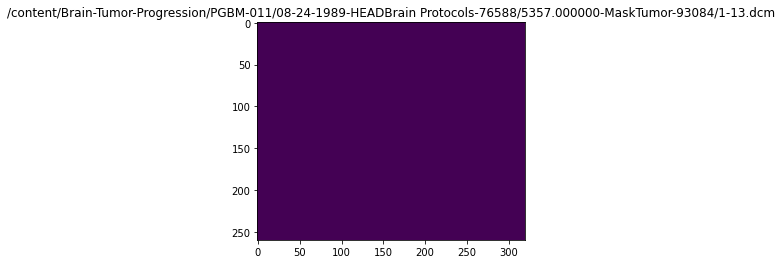

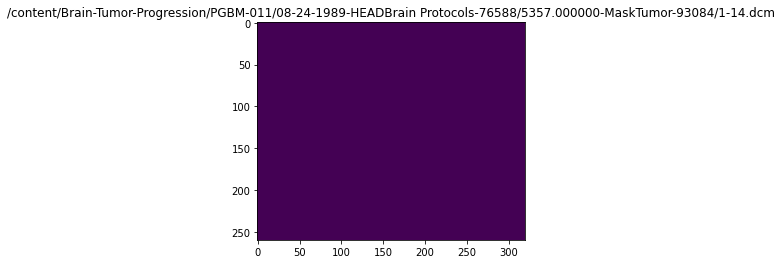

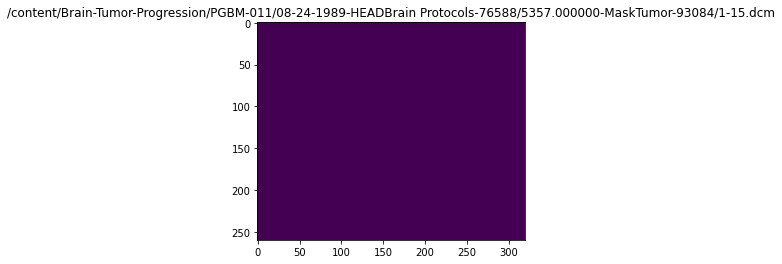

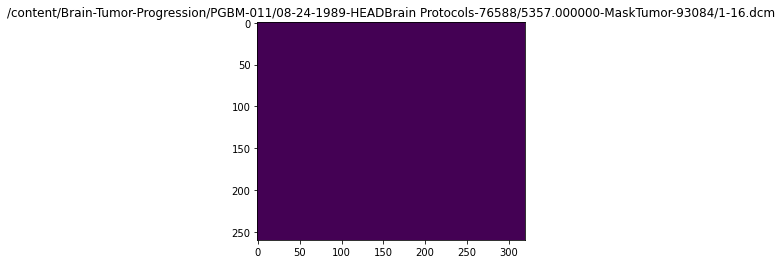

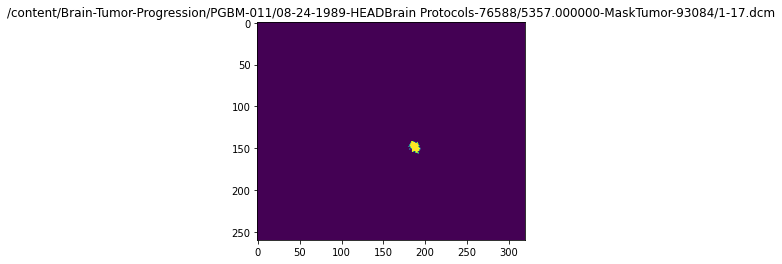

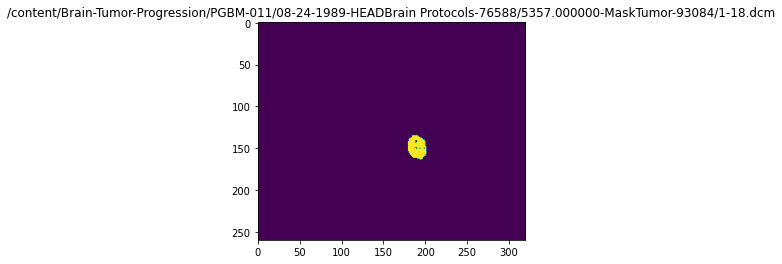

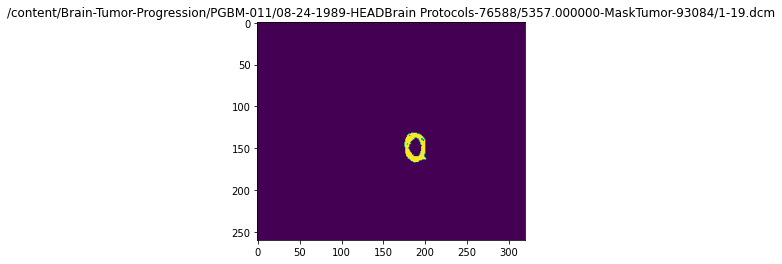

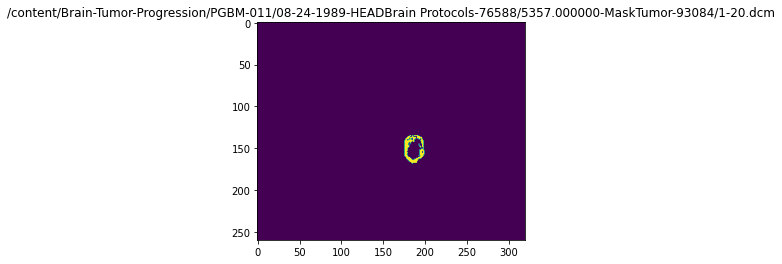

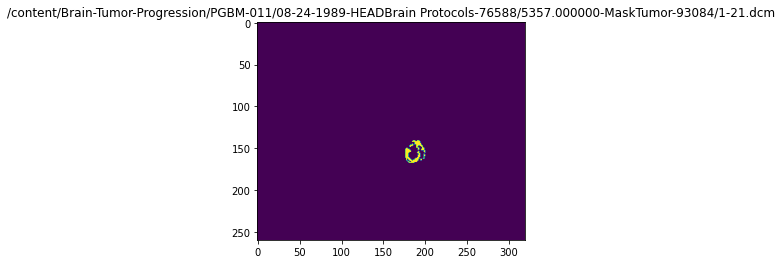

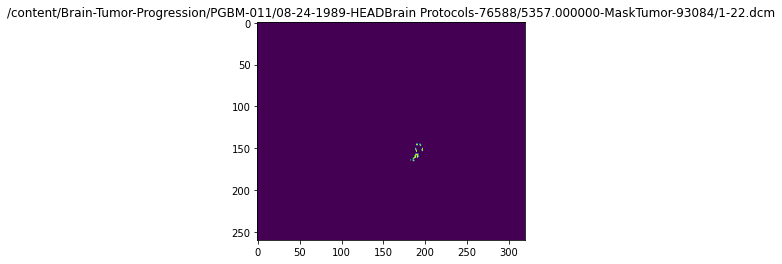

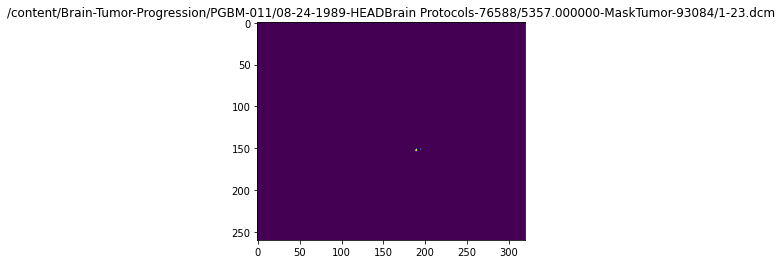

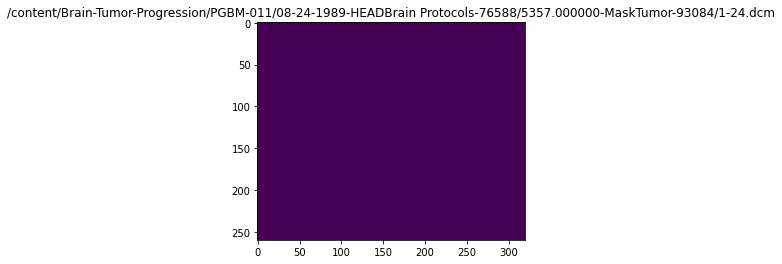

In [ ]:
# Display patient masks (check that masks are visually different from all zeros /all ones)
for mask in df_raw_mask_patient11:
  display_mask(mask)

In [ ]:
slice_tumor = "/content/Brain-Tumor-Progression/PGBM-011/08-24-1989-HEADBrain Protocols-76588/5357.000000-MaskTumor-93084/1-18.dcm"
ds = dicom.dcmread(slice_tumor)
pix_arr_numpy = ds.pixel_array
pd.DataFrame(pix_arr_numpy[150:170, 180:200])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
9,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Create a function to extract unique values in masks (to check if masks are binary or not)
def get_unique_values(mask_path):
  ds = dicom.dcmread(mask_path)
  pixel_array_numpy = ds.pixel_array
  np_mask = cv2.imread(mask_path)
  return np.unique(np_mask)

In [ ]:
# 1st step : Split dataframe train, val, test and save them on disk
def split_dataframe(df, nb_of_train_patients = 16, nb_of_val_patients = 2):
  """ Split the dataframe into train, test and validation by Patient
  By default 16 patients in train, 2 in validation set and 2 in the test set
  """
  patient_indices = []
  for patient in list_patients_id:
    patient_indices.append(patient)

  # Put a seed to reproduce the result
  random.seed(41)

  # Select randomly a certain number of patients for the training set
  train_indices = random.sample(patient_indices, nb_of_train_patients)
  remaining_indices = list(set(patient_indices) - set(train_indices))

  # Select randomly a certain number of patients for the validation set
  val_indices = random.sample(remaining_indices, nb_of_val_patients)
  test_indices = list(set(patient_indices)- set(train_indices) - set(val_indices))

  # Confirm the sum of the length of the created indices (train, validation and test) is the same as the initial dataframe
  assert sorted(train_indices + test_indices + val_indices) == sorted(patient_indices)

  # Subset the dataframe in train, validation, test using the indices computed previously
  raw_dataframe_train = df[df['patient_id'].isin(train_indices)]
  raw_dataframe_val = df[df['patient_id'].isin(val_indices)]
  raw_dataframe_test = df[df['patient_id'].isin(test_indices)]

  # Confirm the sum of the length of the splitted dataframe (train, validation and test) is the same as the initial dataframe
  assert len(df)== (len(raw_dataframe_train) + len(raw_dataframe_val) + len(raw_dataframe_test))

  # Confirm the number of path images in the previous dataframe is same as the sum of the path images in the splitted dataframe
  assert len(df['img_path'].unique()) == (len(raw_dataframe_train['img_path'].unique()) + len(raw_dataframe_val['img_path'].unique()) + len(raw_dataframe_test['img_path'].unique()))

  # Return the dataframe in train, validation and test
  return raw_dataframe_train, raw_dataframe_val, raw_dataframe_test

In [ ]:
# Split the dataframe into train, validation and test using the concatenated dataframe
train_df, val_df, test_df = split_dataframe(appended_data, 16, 2) # Select randomly 16 patients in the train set, then 2 in the validation set ad 2 in the test set

In [ ]:
# Saved the train, validation and test dataframe as csv files
train_df.to_csv("./train_df.csv", sep=',', index=True)
val_df.to_csv("./val_df.csv", sep=',', index=True)
test_df.to_csv("./test_df.csv", sep=',', index=True)

#### **Important remark** : Beware in our problem the masks have 3 different classes !
#### So there is a need to precise the number of classes to convert the masks into a dimension (Width, Height, num_classes)



In [ ]:
mask_tridim = keras.utils.to_categorical(pix_arr_numpy, num_classes = 3)

In [ ]:
mask_tridim.shape

(260, 320, 3)

In [ ]:
# For 1 mask Print unique values corresponding to the presence or not of the class (here we have 3 classes)
for i in range(3):
  print("unique values : ", np.unique(mask_tridim[:,:,i]))

unique values :  [0. 1.]
unique values :  [0. 1.]
unique values :  [0.]


In [ ]:
train_df.columns

Index(['patient_id', 'study_id', 'modality_id', 'slice_id', 'mask_id',
       'mask_path', 'img_path', 'Unique_values', 'Tumor'],
      dtype='object')

In [ ]:
for image, mask in zip(train_df.img_path, train_df.mask_path):
  print(image, mask)
  break

/content/Brain-Tumor-Progression/PGBM-001/11-19-1991-FH-HEADBrain Protocols-40993/37910.000000-T2reg-84816/1-20.dcm /content/Brain-Tumor-Progression/PGBM-001/11-19-1991-FH-HEADBrain Protocols-40993/5364.000000-MaskTumor-94345/1-20.dcm


In [ ]:
train_df.head()

,patient_id,study_id,modality_id,slice_id,mask_id,mask_path,img_path,Unique_values,Tumor
0,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-20.dcm,5364.000000-MaskTumor-94345,/content/Brain-Tumor-Progression/PGBM-001/11-1...,/content/Brain-Tumor-Progression/PGBM-001/11-1...,"[0, 1]",1
1,PGBM-001,11-19-1991-FH-HEADBrain Protocols-40993,37910.000000-T2reg-84816,1-20.dcm,5364.000000-MaskTumor-94345,/content/Brain-Tumor-Progression/PGBM-001/11-1...,/content/Brain-Tumor-Progression/PGBM-001/11-1...,"[0, 1]",1
2,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-15.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1
3,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-20.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1
4,PGBM-001,04-02-1992-FH-HEADBrain Protocols-79896,37908.000000-T2reg-21119,1-16.dcm,5388.000000-MaskTumor-63335,/content/Brain-Tumor-Progression/PGBM-001/04-0...,/content/Brain-Tumor-Progression/PGBM-001/04-0...,"[0, 1]",1


In [ ]:
# Check if path exist for images path
for row in train_df.itertuples():
  assert(os.path.exists(row.img_path))

In [ ]:
# Check if path exist for masks path
for row in train_df.itertuples():
  assert(os.path.exists(row.mask_path))

In [ ]:
# Let' build our custom generator !
def my_real_generator(df, target_size=256, n_classes=3):
  """"Function that produce a generator
  input :
  df : A pandas dataframe containing paths for images and masks in dicom format
  target_size : Format in which we want the images (here it is 256 by 256)
  n_classes : Number of classes the masks possess (in our case uniques values are 0,1,2 so 3 classes)
  return :
  Returns a couple image + mask each as a tensor and presenting the dimensions (batch, target_size, target_size, channels)
  Images should have the format (1, 256, 256, 1), the masks should have the format (1, 256, 256, 3)
   """
  for image_path_dcm, mask_path_dcm in zip(df.img_path, df.mask_path):
    # Read the dicom image and extract the pixel values
    ds_image = dicom.dcmread(image_path_dcm)
    image_array = ds_image.pixel_array

    # Resize the image array
    images_resized = cv2.resize(image_array,
                                (target_size, target_size),
                                interpolation = cv2.INTER_LINEAR)

    # Divide the images by 255 to get values between 0 and 1
    #images_rescaled = [x/255 for x in images_resized]
    images_rescaled = images_resized

    # Modify shape adding 1 channel to match the neural network input size
    images_rescaled = np.expand_dims(images_rescaled, axis = -1)

    # Add another dimension for the channel
    images_batched = np.expand_dims(images_rescaled, axis = 0)

    # Read the dicom mask and extract the pixel values
    ds_mask = dicom.dcmread(mask_path_dcm)
    mask_array = ds_mask.pixel_array

    # Resize the image array
    masks_resized = cv2.resize(mask_array,
                               (target_size, target_size),
                               interpolation = cv2.INTER_LINEAR)

    # Convert the mask into dimension (x, y, n_classes), to get binary value for each class by channel
    masks_3d = keras.utils.to_categorical(masks_resized, num_classes = n_classes)

    # Add another dimension for the channel
    masks_3d_batched = np.expand_dims(masks_3d, axis = 0)

    yield images_batched, masks_3d_batched

In [ ]:
# Get train and validation dataframes
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")

In [ ]:
# data generator
my_generator = my_real_generator(train_df)


In [ ]:
a, b = next(my_generator)

In [ ]:
# Check shape for the images if it is (1, 256, 256, 1)
# this shape is necessary for being understood by the model
print(a,a.shape)

[[[[ 0]
   [ 5]
   [11]
   ...
   [ 6]
   [ 2]
   [ 1]]

  [[ 0]
   [ 4]
   [ 9]
   ...
   [13]
   [ 7]
   [ 1]]

  [[ 0]
   [ 5]
   [14]
   ...
   [11]
   [12]
   [ 1]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]] (1, 256, 256, 1)


In [ ]:
# Check shape for the masks if it is (1, 256, 256, 3)
print(b,b.shape)


[[[[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  ...

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]]] (1, 256, 256, 3)


In [ ]:
for stuff in my_generator:
  print(stuff)

Streaming output truncated to the last 5000 lines.
         [ 0],
         ...,
         [ 0],
         [ 0],
         [ 0]]]], dtype=int16), array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        ...,

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
     

# Model import

In [ ]:
from segmentation_models import Unet
import tensorflow as tf

In [ ]:
# Copy the pretrained weight in the working directory

In [ ]:
cp "/content/drive/MyDrive/Brain_tumor_segmentation/unet_membrane.hdf5" "/content/drive/MyDrive/Brain-Tumor-Progression/segmentation_models/"

cp: cannot stat '/content/drive/MyDrive/Brain_tumor_segmentation/unet_membrane.hdf5': No such file or directory


In [ ]:
weight_path = "/content/Brain-Tumor-Progression/segmentation_models/unet_membrane.hdf5"

In [ ]:
fouad_model = Unet.unet(pretrained_weights=weight_path, input_size=(256,256,1), n_classes=3)
fouad_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

In [ ]:
# Create init function to launch the model before the main
opt = Adam(lr = 1e-5, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)
#loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits = True)

# Compile the model with accuracy
fouad_model.compile(optimizer = opt,
          loss = 'categorical_crossentropy',
          metrics = ['accuracy'])

# Training : Experiment 1

In [ ]:
# Initiate train and validation generator
my_train_generator = my_real_generator(train_df)
my_val_generator = my_real_generator(val_df)

In [ ]:
a, b = next(my_train_generator)
print(a.shape, b.shape)

(1, 256, 256, 1) (1, 256, 256, 3)


In [ ]:
a, b = next(my_val_generator)
print(b, b.shape)

[[[[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  ...

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]]] (1, 256, 256, 3)


In [ ]:
# Define number of epochs
NO_OF_EPOCHS = 2

In [ ]:
# Function to initiate training
for EPOCH in range(NO_OF_EPOCHS):
  # Build & re-build if exhausted : train and validation generator
  my_train_generator = my_real_generator(train_df)
  my_val_generator = my_real_generator(val_df)

  results = fouad_model.fit(my_train_generator, epochs = 1,
                        validation_data = my_val_generator)
                        # callbacks = callbacks_list)
  #Save the final model for each epoch
  fouad_model.save(f'Model_unet{str(EPOCH)}.h5')

1014/1014 [==============================] - 61s 60ms/step - loss: 1.0794 - accuracy: 0.9957 - val_loss: 1.0730 - val_accuracy: 0.9955


### Test the ouput:

In [ ]:
test_df = pd.read_csv("test_df.csv")

(1, 256, 256, 1)


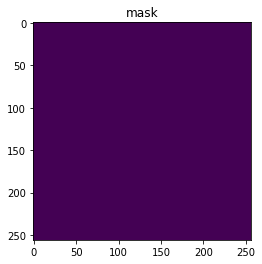

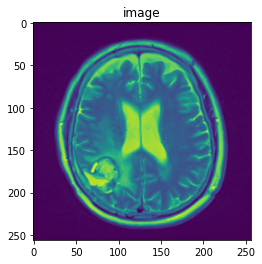

In [ ]:
my_test_generator = my_real_generator(test_df)
a,b = next(my_test_generator)
print(a.shape)
test_results = fouad_model.predict(a)
plt.title("mask")
plt.imshow(np.argmax(test_results[0,:,:,:], axis =-1))
plt.show()
plt.title("image")
plt.imshow(np.reshape(a,(256,256)))
plt.show()

# Training : Experiment 2

In [ ]:
true_tensor = tf.constant([
                           [
                            [
                                [1, 0, 0, 0],
                                [1., 1 ,0, 0],
                                [1., 0 ,1.,0],
                                [0, 0, 0, 0]

                                ],
                              [
                                [0, 1., 1., 0],
                                [0, 0 ,1., 0],
                                [0, 0 ,0, 0],
                               [0, 0, 0, 0]
                                ],
                              [
                                [0, 0, 0, 1],
                                [0, 0 ,0, 1],
                                [0, 1. ,0, 1],
                               [1, 1, 1, 1]

                                ]

                              ]
                            ], dtype=tf.float16)


pred_tensor = tf.constant([
                           [
                            [
                              [0, 0, 0],
                              [0., 1 ,1],
                              [1., 0 ,1.]
                              ],
                             [
                              [0, 0., 1.],
                              [0, 0 ,0.],
                              [0, 0 ,0]
                              ],
                             [
                              [1, 1, 0],
                              [1, 0 ,0],
                              [0, 1. ,0]
                              ]
                           ]
                          ], dtype=tf.float16)





eps = tf.constant(1e-7, dtype=tf.float16)

weights = (tf.math.reduce_sum(true_tensor, axis=(1,2)))
#mat_a = -tf.math.log(pred_tensor + eps)*true_tensor
#mat_b = (1 - (weights/tf.reduce_sum(weights)))
#non_averaged = tf.math.reduce_sum(mat_a*mat_b, axis =[1,2,3])
#res = tf.math.reduce_mean(non_averaged)
#res

In [ ]:
true_tensor_numpy = np.array([
                           [
                            [
                                [1, 0, 0, 0],
                                [1., 1 ,0, 0],
                                [1., 0 ,1.,0],
                                [0, 0, 0, 0]

                                ],
                              [
                                [0, 1., 1., 0],
                                [0, 0 ,1., 0],
                                [0, 0 ,0, 0],
                               [0, 0, 0, 0]
                                ],
                              [
                                [0, 0, 0, 1],
                                [0, 0 ,0, 1],
                                [0, 1. ,0, 1],
                               [1, 1, 1, 1]

                                ]

                              ]
]
)


In [ ]:
true_tensor_numpy

array([[[[1., 0., 0., 0.],
         [1., 1., 0., 0.],
         [1., 0., 1., 0.],
         [0., 0., 0., 0.]],

        [[0., 1., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 1.],
         [1., 1., 1., 1.]]]])

Be careful ! The representation of the tensors is different in tensorflow. Here for example our tensor shape is (1,3,4,4), the channel  dimension is 3 and is not at the end as we would have expected.

In [ ]:
true_tensor

<tf.Tensor: shape=(1, 3, 4, 4), dtype=float16, numpy=
array([[[[1., 0., 0., 0.],
         [1., 1., 0., 0.],
         [1., 0., 1., 0.],
         [0., 0., 0., 0.]],

        [[0., 1., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 1.],
         [1., 1., 1., 1.]]]], dtype=float16)>

In [ ]:
true_tensor_numpy

array([[[[1., 0., 0., 0.],
         [1., 1., 0., 0.],
         [1., 0., 1., 0.],
         [0., 0., 0., 0.]],

        [[0., 1., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 1.],
         [1., 1., 1., 1.]]]])

In [ ]:
# 2nd position correspond to channel
true_tensor[:,0,:,:]

To get a matrix with channels at the end we use reshape function the dimension [1] representing the channel is implicitly deduced by the -1, initially the dimension [0] corresponds to the batch, the dimensions [2] and [3] to the rows and columns.
With numpy we don't have this problem !

In [ ]:
t2 = tf.reshape(true_tensor, (true_tensor.shape[0],true_tensor.shape[2],true_tensor.shape[3],-1))
t2[0]

<tf.Tensor: shape=(4, 4, 3), dtype=float16, numpy=
array([[[1., 0., 0.],
        [0., 1., 1.],
        [0., 0., 1.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]],

       [[0., 0., 0.],
        [1., 0., 1.],
        [0., 1., 1.],
        [1., 1., 1.]]], dtype=float16)>

In [ ]:
# sum by channel (axis = -1)
tf.reduce_sum(t2, axis = (1,2))

<tf.Tensor: shape=(1, 3), dtype=float16, numpy=array([[4., 5., 7.]], dtype=float16)>

In [ ]:
t2

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float16, numpy=
array([[[[1., 0., 0.],
         [0., 1., 1.],
         [0., 0., 1.],
         [0., 1., 0.]],

        [[0., 0., 0.],
         [0., 0., 1.],
         [1., 0., 0.],
         [0., 1., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]],

        [[0., 0., 0.],
         [1., 0., 1.],
         [0., 1., 1.],
         [1., 1., 1.]]]], dtype=float16)>

In [ ]:
t3 = tf.constant([
                           [
                            [
                              [0, 0, 0, 0],
                              [0., 1 ,1,0],
                              [1., 0 ,1.,0],
                              [0, 0, 0, 0]
                              ],
                             [
                              [0, 0., 1., 1],
                              [0, 0 ,0., 1],
                              [0, 0 ,0, 1],
                              [1, 1, 1, 1]

                              ],
                             [
                              [1, 1, 0, 0],
                              [1, 0 ,0, 0],
                              [0, 1. ,0, 0],
                              [0, 0, 0, 0]

                              ]
                           ]
                          ], dtype=tf.float16
                          )
t3

<tf.Tensor: shape=(1, 3, 4, 4), dtype=float16, numpy=
array([[[[0., 0., 0., 0.],
         [0., 1., 1., 0.],
         [1., 0., 1., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 1., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 0., 0.]]]], dtype=float16)>

In [ ]:
t3 = tf.reshape(t3, (t3.shape[0],t3.shape[2],t3.shape[3],-1))
t3.shape, t2.shape

(TensorShape([1, 4, 4, 3]), TensorShape([1, 4, 4, 3]))

In [ ]:
   [0, 1., 1.],
  [0, 0 ,1.],
  [0, 0 ,0]
  ],

In [ ]:
print(true_tensor.shape)

(1, 3, 3, 3)


In [ ]:
# Axis= 0 batch summation
tf.math.reduce_sum(true_tensor, axis=(0))

<tf.Tensor: shape=(3, 4, 4), dtype=float16, numpy=
array([[[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 0., 0.]],

       [[0., 1., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.]]], dtype=float16)>

In [ ]:
# Summation by row (axis=1)
tf.math.reduce_sum(true_tensor, axis=(-1))

<tf.Tensor: shape=(1, 3, 3), dtype=float16, numpy=
array([[[1., 2., 2.],
        [2., 1., 0.],
        [0., 0., 1.]]], dtype=float16)>

In [ ]:
tf.reshape(mat_b,(3,1))

<tf.Tensor: shape=(3, 1), dtype=float16, numpy=
array([[0.4443],
       [0.667 ],
       [0.8887]], dtype=float16)>

In [ ]:
tf.math.log(rank_2_tensor + eps)

<tf.Tensor: shape=(3, 3, 3), dtype=float16, numpy=
array([[[  0.4055, -15.945 , -15.945 ],
        [  0.    ,   0.    , -15.945 ],
        [  0.    , -15.945 ,   0.    ]],

       [[-15.945 ,   0.    ,   0.    ],
        [-15.945 , -15.945 ,   0.    ],
        [-15.945 , -15.945 , -15.945 ]],

       [[-15.945 , -15.945 , -15.945 ],
        [-15.945 , -15.945 , -15.945 ],
        [-15.945 ,   0.    , -15.945 ]]], dtype=float16)>

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(3, 3, 3), dtype=float16, numpy=
array([[[1.5, 0. , 0. ],
        [1. , 1. , 0. ],
        [1. , 0. , 1. ]],

       [[0. , 1. , 1. ],
        [0. , 0. , 1. ],
        [0. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 1. , 0. ]]], dtype=float16)>

In [ ]:
preweight = np.argmax(b, axis=-1)[0,:,:]
weight = np.zeros_like(b[0,:,:])
#np.unique(preweight)

preweight[preweight==0] = 1
preweight[preweight==1] = 1000
preweight[preweight==2] = 1

weight_path[:,:,0]

np.unique(preweight)
#plt.imshow(np.squeeze(preweight, axis=0))
#plt.show()

array([   1, 1000])

In [ ]:
from tensorflow.keras.losses import *

class Custom_categorical_ce(Loss):

  def call(self, y_true, y_pred):

    eps = tf.constant(1e-7, dtype=tf.float)

    weights = (tf.math.reduce_sum(y_true, axis=(1,2)))

    mat_a = - tf.math.log(tf.math.add(y_pred,eps))*y_true
    #mat_a = - tf.math.log(y_pred)*y_true
    mat_b = (1 - (weights/tf.reduce_sum(weights)))

    non_averaged = tf.math.reduce_sum(mat_a*mat_b, axis =[1,2,3])

    res = tf.math.reduce_mean(non_averaged)

    return res

In [ ]:
import tensorflow.keras.backend as kb
import tensorflow as tf

def custom_categorical_ce(y_true, y_pred):

  #eps = tf.constant(1e-7, dtype=tf.float)

  weights = (tf.math.reduce_sum(y_true, axis=(1,2))) # Sum according to (W,H) dimensions
                                                     # which gives a matrix of size (N,C)
                                                     # with N the batch size and C the channel size

  mat_a = - tf.math.log(tf.math.add(y_pred, 1e-7))*y_true # Add an epsilon term to avoid to have a zero value inside the log term
                                                          # Shape of mat_a is (N,W,H,C)

  mat_b = 10*(1 - ((weights)/tf.reduce_sum(weights))) # Weights inversly proportional to the proportion of "1" for each class
                                                      # By doing "1-class_ratio" the under represented class (like the tumors)
                                                      # by giving them a higher weight value !
                                                      # Shape of mat_b is (N,C)

  non_averaged = tf.math.reduce_sum(mat_a*mat_b, axis =[1,2,3]) # Here the values will be broadcasted
                                                                # the size of the dot product will be the size of the initial matrix mat_a
                                                                # Shape of non-averaged is (N,)

  res = tf.math.reduce_mean(non_averaged) # Average computed for the batch dimension

  return res

In [ ]:
weights_test = (tf.math.reduce_sum(t2, axis=(1,2)))
weights_test

<tf.Tensor: shape=(1, 3), dtype=float16, numpy=array([[4., 5., 7.]], dtype=float16)>

In [ ]:
t3

In [ ]:
t2

In [ ]:
# Comment everything

In [ ]:
mat_a = - tf.math.log(tf.math.add(t3, 1e-7))*t2
mat_a

In [ ]:
mat_b = 10*(1 - ((weights_test)/tf.reduce_sum(weights_test)))
mat_b

<tf.Tensor: shape=(1, 3), dtype=float16, numpy=array([[7.5  , 6.875, 5.625]], dtype=float16)>

In [ ]:
mat_a * mat_b

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float16, numpy=
array([[[[119.56,   0.  ,   0.  ],
         [  0.  , 109.6 ,   0.  ],
         [  0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  ]],

        [[  0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,  89.7 ],
         [  0.  ,   0.  ,   0.  ],
         [  0.  , 109.6 ,   0.  ]],

        [[  0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,  89.7 ]],

        [[  0.  ,   0.  ,   0.  ],
         [119.56,   0.  ,   0.  ],
         [  0.  , 109.6 ,  89.7 ],
         [119.56, 109.6 ,  89.7 ]]]], dtype=float16)>

In [ ]:
fouad_model = Unet.unet(pretrained_weights=None, input_size=(256,256,1), n_classes=3)

# Create init function to launch the model before the main
opt = Adam(lr = 1e-5, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)
#loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits = True)

# Compile the model with accuracy
fouad_model.compile(optimizer = opt,
          loss = custom_categorical_ce,
          metrics = ['accuracy'])

In [ ]:
# Define number of epochs
NO_OF_EPOCHS = 15

In [ ]:
# Function to initiate training
for EPOCH in range(NO_OF_EPOCHS):
  # Build & re-build if exhausted : train and validation generator
  my_train_generator = my_real_generator(train_df)
  my_val_generator = my_real_generator(val_df)

  results = fouad_model.fit(my_train_generator, epochs = 1,
                        validation_data = my_val_generator)
                        # callbacks = callbacks_list)
  #Save the final model for each epoch
  fouad_model.save(f'Model_unet{str(EPOCH)}.h5')

1014/1014 [==============================] - 60s 60ms/step - loss: 2009.5693 - accuracy: 0.9683 - val_loss: 3053.2686 - val_accuracy: 0.9635


In [ ]:
test_df = pd.read_csv("test_df.csv")

(1, 256, 256, 1)


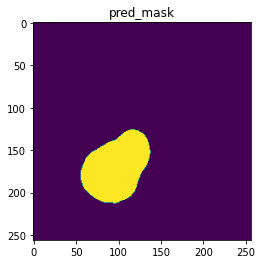

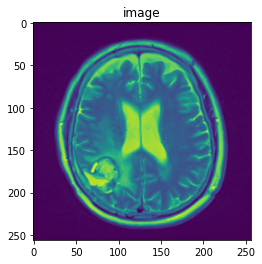

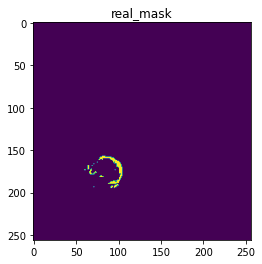

In [ ]:
my_test_generator = my_real_generator(test_df)
a,b = next(my_test_generator)
print(a.shape)
test_results = fouad_model.predict(a)
plt.title("pred_mask")
plt.imshow(np.argmax(test_results[0,:,:,:], axis =-1))
plt.show()
plt.title("image")
plt.imshow(np.reshape(a,(256,256)))
plt.show()
plt.title("real_mask")
plt.imshow(np.argmax(b[0,:,:,:], axis =-1))
plt.show()

In [ ]:
# First need to predict with that model then modify the model (change loss then other metrics etc)
# Need to weight the classes
# Add date on saved model
# Clean the folders

In [ ]:
# See the prediction with RMSprop or Adam only
#Clean and add elements of the old notebook

In [ ]:
# Does the model predict as it should (zeros and one)
# pixelweighted cross entropy
# Implement another loss
# Tensorboard in colab